# Сборный проект 1

# Аналитический кейс на примере интернет-магазина компьютерных игр "Стримчик"

**Описание проекта**

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Цель проекта - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Доступны данные до 2016 года. Предроложим, что планируется кампания на следующий 2017 год.

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.*

*В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*

**Последовательность выполнения проекта**

**Шаг 1. Откройте файл с данными и изучите общую информацию**

Путь к файлу: /datasets/games.csv.

**Шаг 2. Подготовьте данные**
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
 - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 - Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Шаг 3. Проведите исследовательский анализ данных**
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4. Составьте портрет пользователя каждого региона**
- Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверьте гипотезы**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.
- Поясните:
 - Как вы сформулировали нулевую и альтернативную гипотезы;
 - Какой критерий применили для проверки гипотез и почему.

**Шаг 6. Напишите общий вывод**

## Выполнение проекта

**Шаг 1. Откроем файл с данными и изучим общую информацию**

Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в пременную `games`. Путь к файлу: `/datasets/games.csv`

In [1]:
import pandas as pd

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Выведем первые 20 строчек датафрейма на экран.

In [3]:
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем основную информацию о датафрейме `games` с помощью метода `info()`.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


На этом шаге данные считаны из файла и сохранены в переменную `games`. Данные содержат 16715 строк и 11 столбцов, столбцы имеют разный тип данных `object` и `float`. Названия столбцов не в `snake_case`. Тип данных некоторых столбцов не соответствует их содержанию. В данных имеются пропуски.

**Шаг 2. Подготовим данные**

Названия столбцов не в `snake_case`. Исправим это и проверим результат.

In [5]:
games.rename(columns=str.lower, inplace=True)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Столбец `year_of_release` имеет тип данных `float`, нужно заменить на  `int`, т.к. год выпуска может быть только целым числом. Но также столбец содержит пропуски, поэтому нужно сначала обработать их. Посмотрим, какие значения содержит столбец `year_of_release`.

In [6]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Столбец кроме пропусков содержит только годы выпуска игр с 1980 по 2016, что выглядит достоверным. При этом в датафрейме полностью заполнены столбцы с основной необходимой для анализа информацией, а именно данные о продажах во всех регионах, платформах, на которых выходили игры и жанрах игр (два пропуска в столбце с жанром не имеют значения). Поэтому, не смотря на то, что пропусков в столбце `year_of_reliase` не много (ок. 1.5%), можно не удалять их, а заменить на `0`, что при дальнейшем анализе будем понимать как отсутствие данных.

In [7]:
games['year_of_release'] = games['year_of_release'].fillna(0)

Теперь можем поменять тип данных в столбце `year_of_release`

In [8]:
games['year_of_release'] = games['year_of_release'].astype('int', errors='raise')

Проверим результат произведенных изменений.

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


Столбец `user_score` имеет тип данных `object`, нужно заменить на `float`, т.к рейтинг выражен десятичной дробью. Проверим, какие значения есть в столбце.

In [10]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `user_score` кроме пропусков и значений, обозначающих рейтинг игры, присутствует еще значение `tbd`. 

По поводу значения `tbd` можно сделать два предположения:
1. `tbd` означает в прямом смысле `to be determined`, т.е. `подлежит уточнению` для совсем новых игр, пользовательская оценка по которым до конца не сформирована. В этом случае год выпуска игр со значением `user_score` равным `tbd` должен быть 2016.
2. `tbd` используется для обозначения рейтинга компьютерных игр в том случае, когда издатель не захотел получать рейтинговую оценку ESRB или игра не планировалась выпускаться для региона Северная Америка, и возможно в данном случае мы имеем дело с ошибкой заполнения, когда данные вместо столбца `rating` попали или были продублированы в столбце `user_score`. В этом случае в столбе `rating` должен быть либо `0`, либо такое же значение `tbd`.

Проверим оба этих предположения, выведя строки со значением `tbd` в столбце `user_score` на экран

In [11]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Ни одно из предположений не подтвердилось. Игры со значением `user_score` равным `tbd` имеют разные годы выпуска и рейтинг. Соответственно такое значение `user_score` не несет полезной для дальнейшего анализа информации. Также столбец `user_score' содержит пропуски. По аналогии с `year_of_release` можно заменить пропуски и значение `tbd` на `0`, в дальнейшем имея в виду, что это отсутствие данных. Но в столбце уже есть значение `0`, хотя это и странно, т.к. обычно рейтинг игр отличается от нуля. Изучим подробнее.

In [12]:
games.query('user_score == "0"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


Всего одна запись (может быть это настоящий рейтинг этой игры, хотя это и мало вероятно). Заменим пропуски и значения `tbd` в столбце `user_score` на `0` и в дальнейшем будем иметь в виду, что `0` это отсутствие данных. После этого поменяем тип данных в столбце на `float` и проверим результат изменений. 

In [13]:
games['user_score'] = games['user_score'].replace('tbd', 0)
games['user_score'] = games['user_score'].fillna(0)
games['user_score'] = games['user_score'].astype('float', errors='raise')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Обработаем пропуски в столбце `critic_score`. Рассмотрим уникальные значения в столбце.

In [14]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

По аналогии с `user_score` заменим пропуски на `0` и в дальнейшем будем учитывать, что ноль это отсутствие данных.

In [15]:
games['critic_score'] = games['critic_score'].fillna(0)

Обработаем пропуски в столбце `rating`. Рассмотрим уникальные значения в столбце.

In [16]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В данном случае как раз логично заменить пропуски на `tbd`, т.к. эта абревиатура и используется в случае отсутствия рейтинга.

In [17]:
games['rating'] = games['rating'].fillna('tbd')

Обработаем пропуски в столбцах `name` и `genre`. Изучим их.

In [18]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,0.0,0.0,tbd
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,0.0,0.0,tbd


Пропуски в столбцах `name` и `genre` совпадают. Поскольку их количество незначительно, удалим эти пропуски. И проверим датасет после всех изменений.

In [19]:
games = games.dropna(subset=['name'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


Добавим столбец с сумарными продажами по всеем регионам. Выведем первые 5 строк на экран.

In [20]:
sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
games['world_wide_sales'] = games[sales].sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_wide_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38


На этом шаге привели название столбцов к `snake_case`, изменили типы данных столбцов в соответствии с содержащейся информацией, обработали пропуски в столбцах и добавили в датафрейм столбец с сумарной выручкой по всем регионам.

**Шаг 2. Проведем исследовательский анализ данных**

Посмотрим, сколько игр выпускалось в разные годы, построим гистограмму.

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


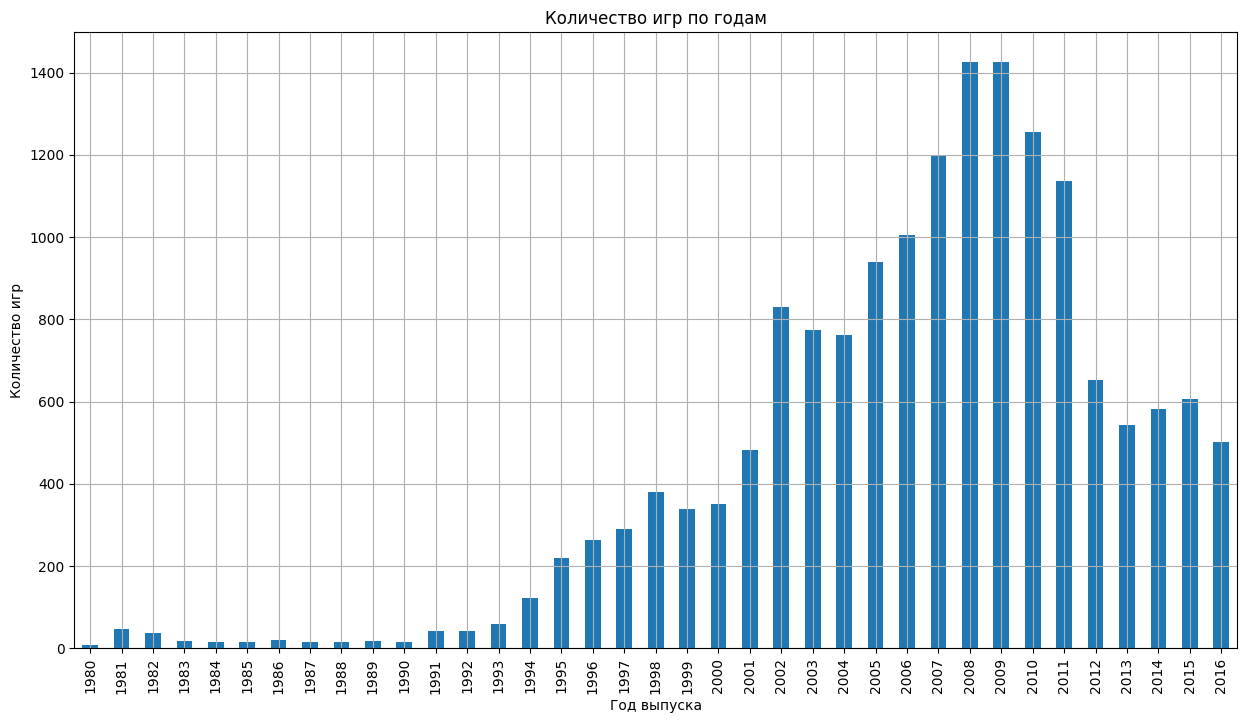

In [21]:
games_year_known = games.query('year_of_release != 0')
games_by_year = games_year_known.groupby('year_of_release')['name'].count()
print(games_by_year)
games_by_year.plot(kind='bar', figsize=(15, 8), xlabel='Год выпуска', ylabel='Количество игр',\
                   title='Количество игр по годам', grid=True);

Исходя из полученных данных можно сделать следующие выводы:
1. На этапе с 1980 года по 1992 год ежегодно выпускалось менее 50 игр.
2. Начиная с 1993 года по 2008 год происходит значительное увеличение количества ежегодно выпускаемых компьютерных игр. Если в 1993 году выпущено 60 игр, то в 2008 - 1427 игр, т.е. количество разных игр, выпускаемых за год, увеличилось более, чем в 20 раз.
3. На этапе с 2009 года по 20013 год произошло снижение с 1426 до 544 ежегодно выпускаемых игр соответственно, т.е почти троекратное снижение.
4. За 2014, 2015 и 2016 годы было выпущено 581, 606 и 502 игры.

Посмотрим суммарные продажи по платформам за все годы.

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: world_wide_sales, dtype: float64


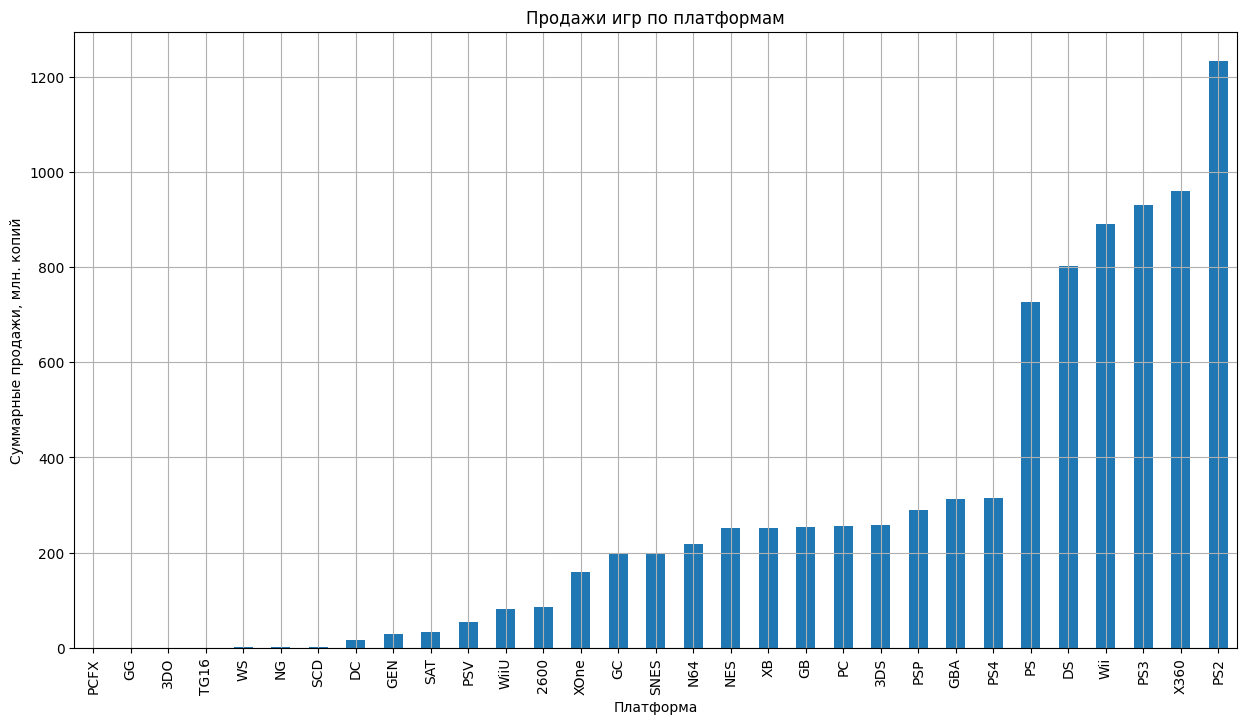

In [22]:
sales_by_platform_sum = games_year_known.groupby('platform')['world_wide_sales'].sum().sort_values()
print(sales_by_platform_sum)
sales_by_platform_sum.plot(kind='bar', figsize=(15, 8), xlabel='Платформа', ylabel='Суммарные продажи, млн. копий',\
                           title='Продажи игр по платформам', grid=True);

Выберем платформы с максимальными суммарными продажами. На графике явно выделяются шесть платформ с количеством проданных копий более 700 млн., тогда как у всех остальных ок. 300 млн. и менее.

In [23]:
top_platforms_list = sales_by_platform_sum.tail(6)
top_platforms_list

platform
PS       727.58
DS       802.78
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: world_wide_sales, dtype: float64

In [24]:
top_platforms = games_year_known.query('platform in @top_platforms_list.index')

Изучим, как менялись подажи на этих платформах от года к году. Построим распределение по годам.

C:\Users\EliteBook\AppData\Local\Temp\ipykernel_12780\4112101337.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=top_platforms, x='year_of_release', y='world_wide_sales', hue='platform', estimator=sum, ci=None)


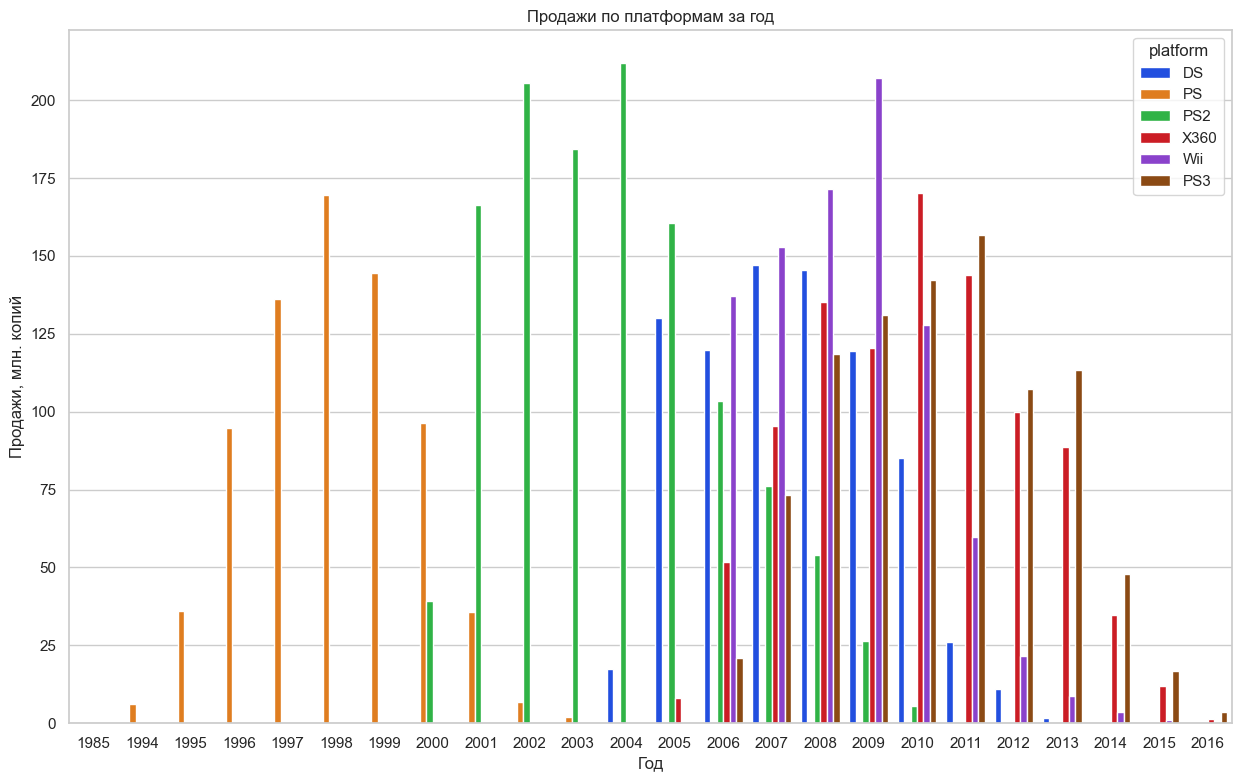

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 9))
sns.set(palette='bright', style='whitegrid')
ax = sns.barplot(data=top_platforms, x='year_of_release', y='world_wide_sales', hue='platform', estimator=sum, ci=None)
ax.set(xlabel='Год', ylabel='Продажи, млн. копий', title='Продажи по платформам за год');

Исходя из графика можно сделать следующие вывод:
1. Платформы проходят фазу роста, пик и фазу снижения продаж (в количетве проданных копий игр).
2. Пиков может быть несколько, скорее всего это связано с выходом успешных игр.
3. Начиная с 2013 года продажи на всех рассматриваемых платформах снижаются.

Изучим, за какой срок появляются новые платформы и исчезают старые. Посмотрим, как часто появляются новые платформы.

In [26]:
platform_appearance = games_year_known[['platform', 'year_of_release']].drop_duplicates().groupby('platform')['year_of_release'].first().sort_values()
platform_appearance

platform
2600    1982
NES     1985
SNES    1990
GEN     1992
GG      1992
SCD     1993
NG      1994
3DO     1995
TG16    1995
SAT     1995
GB      1996
PCFX    1996
N64     1996
PS      1997
DC      1998
WS      2000
GC      2001
GBA     2002
XB      2004
PS2     2004
PSP     2005
Wii     2006
DS      2006
PC      2009
X360    2010
3DS     2013
PS3     2013
PSV     2014
WiiU    2014
PS4     2015
XOne    2015
Name: year_of_release, dtype: int32

Начиная с 1990 года новые платформы появляются практически ежегодно, иногда даже чаще (несколько новых платформ в год). Рассчитаем среднее значение появления новой платформы.

In [27]:
platform_appearance.diff().mean()

1.1

В среднем новая платформа появляется каждые 1.1 года.

Рассмотрим, за какое время исчезают старые платформы. Посчитаем среднюю "продолжительность жизни" платформы.

In [28]:
platform_lifetime = games_year_known[['platform', 'year_of_release']].drop_duplicates().groupby('platform')['year_of_release'].count().mean()
platform_lifetime

7.67741935483871

Средняя "продолжительность жизни" платформы 7.7 года.

Для дальнейшего анализа отберем игры с датой релиза 2013 год и позднее, т.к. в 2013 году закончилось локальное снижение количества выпускаемых ежегодно игр, а также начиная с 2013 года начали появляться актуальные на сегодняшний момент платформы. Данные за этот период помогут построить прогноз на 2017 год.

In [29]:
games_actual = games_year_known.query('year_of_release >= 2013')
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2233 non-null   object 
 1   platform          2233 non-null   object 
 2   year_of_release   2233 non-null   int32  
 3   genre             2233 non-null   object 
 4   na_sales          2233 non-null   float64
 5   eu_sales          2233 non-null   float64
 6   jp_sales          2233 non-null   float64
 7   other_sales       2233 non-null   float64
 8   critic_score      2233 non-null   float64
 9   user_score        2233 non-null   float64
 10  rating            2233 non-null   object 
 11  world_wide_sales  2233 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 218.1+ KB


Для начала посмотрим суммарные продажи по платформам.

platform
DS        1.54
PSP       3.50
Wii      13.66
PSV      32.99
PC       39.43
WiiU     64.63
X360    136.80
3DS     143.25
XOne    159.32
PS3     181.43
PS4     314.14
Name: world_wide_sales, dtype: float64


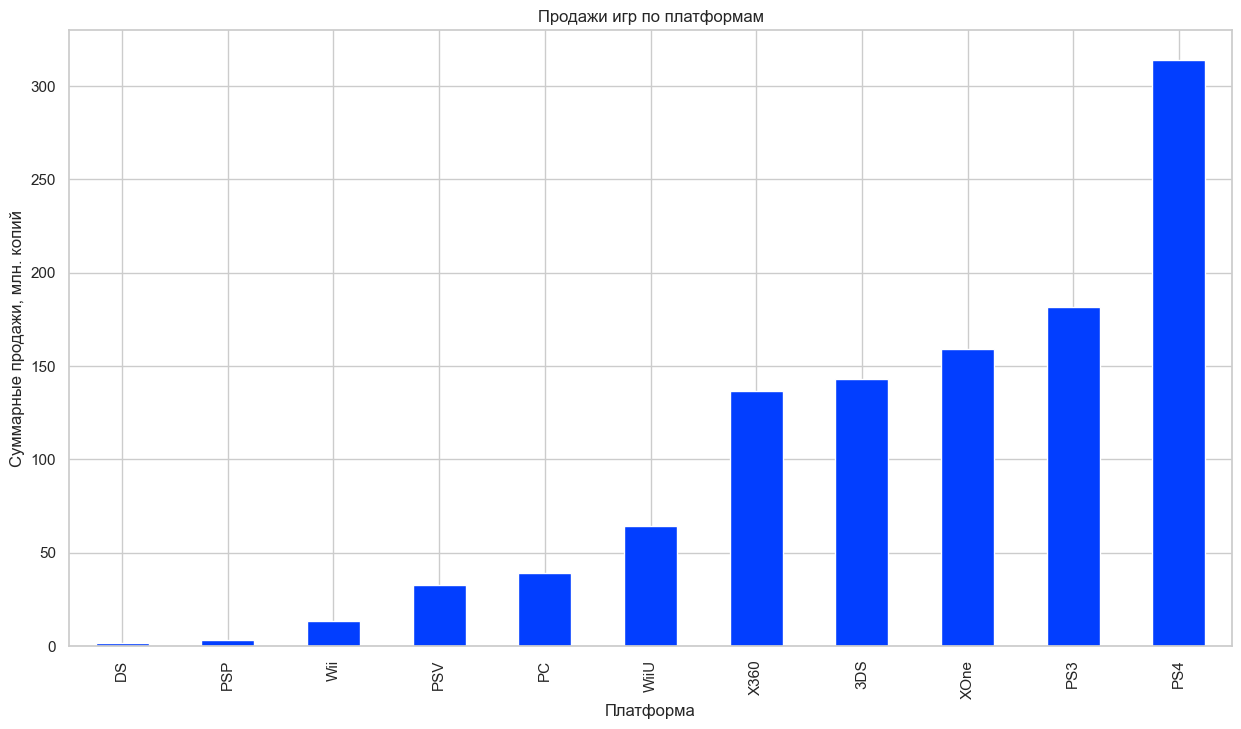

In [30]:
sales_by_actual_platform_sum = games_actual.groupby('platform')['world_wide_sales'].sum().sort_values()
print(sales_by_actual_platform_sum)
sales_by_actual_platform_sum.plot(kind='bar', figsize=(15, 8), xlabel='Платформа', ylabel='Суммарные продажи, млн. копий',\
                           title='Продажи игр по платформам', grid=True);

Также посмотрим распределение продаж по годам.

C:\Users\EliteBook\AppData\Local\Temp\ipykernel_12780\1967226503.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=games_actual, x='year_of_release', y='world_wide_sales', hue='platform', estimator=sum, ci=None)


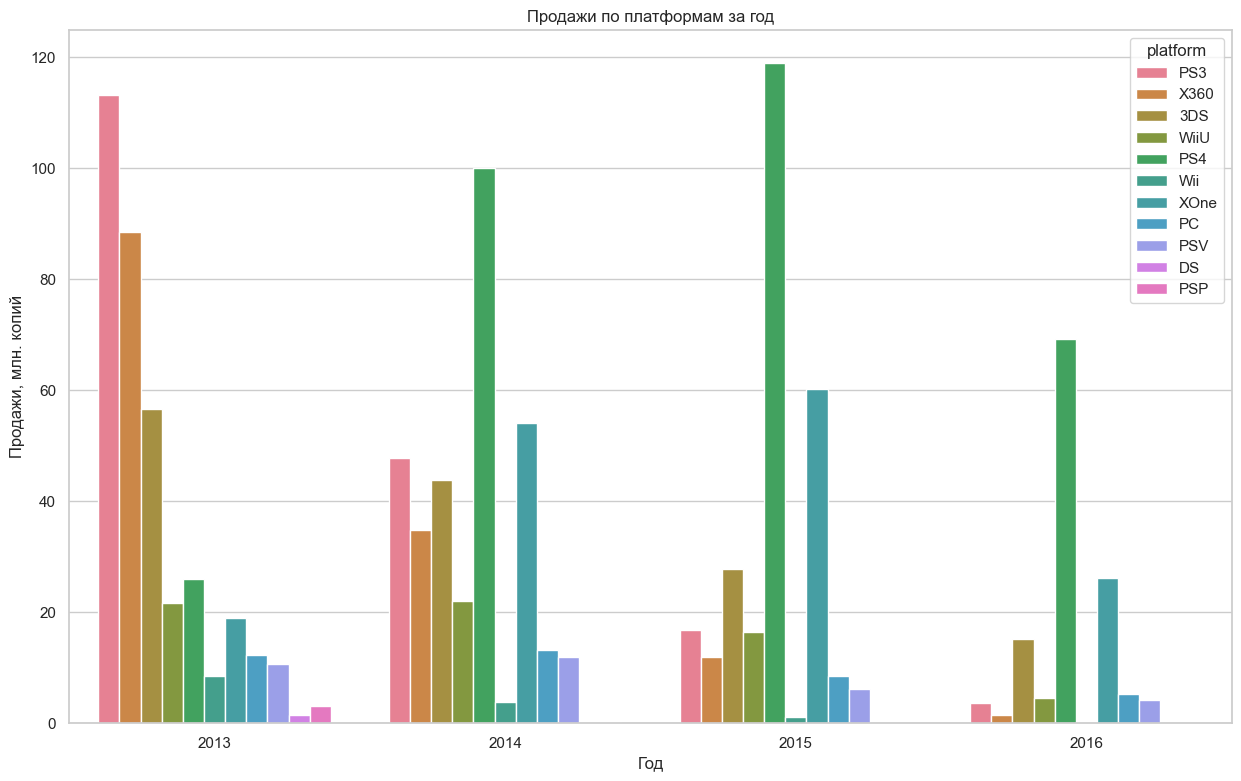

In [31]:
plt.figure(figsize=(15, 9))
sns.set(palette='bright', style='whitegrid')
ax = sns.barplot(data=games_actual, x='year_of_release', y='world_wide_sales', hue='platform', estimator=sum, ci=None)
ax.set(xlabel='Год', ylabel='Продажи, млн. копий', title='Продажи по платформам за год');

In [32]:
games_actual_by_year = games_actual[['platform', 'year_of_release', 'world_wide_sales']]\
.groupby(['platform', 'year_of_release']).agg({'world_wide_sales':['sum']})
games_actual_by_year

world_wide_sales
                                      sum
platform year_of_release                 
3DS      2013                       56.57
         2014                       43.76
         2015                       27.78
         2016                       15.14
DS       2013                        1.54
PC       2013                       12.38
         2014                       13.28
         2015                        8.52
         2016                        5.25
PS3      2013                      113.25
         2014                       47.76
         2015                       16.82
         2016                        3.60
PS4      2013                       25.99
         2014                      100.00
         2015                      118.90
         2016                       69.25
PSP      2013                        3.14
         2014                        0.24
         2015                        0.12
PSV      2013                       10.59
         2014                       11.90
         2015                        6.25
         2016                        4.25
Wii      2013                        8.59
         2014                        3.75
         2015                        1.14
         2016                        0.18
WiiU     2013                       21.65
         2014                       22.03
         2015                       16.35
         2016                        4.60
X360     2013                       88.58
         2014                       34.74
         2015                       11.96
         2016                        1.52
XOne     2013                       18.96
         2014                       54.07
         2015                       60.14
         2016                       26.15

Исходя из полученных данных и учитывая, что данные за 2016 год могут быть не полными, за период с 2013 года значимый рост можно отметить только у двух платформ, которые являются лидерами по количеству проданных копий игр, - PS4 и XOne, при этом PS4 продает примерно в два раза больше копий в год. Продажи остальных платформ либо снижаются, либо уже сошли на нет. В качестве потенциально прибыльных платформ можно выбрать три платформы с наибольшими продажами за 2015-2016 года - PS4, XOne и 3DS.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

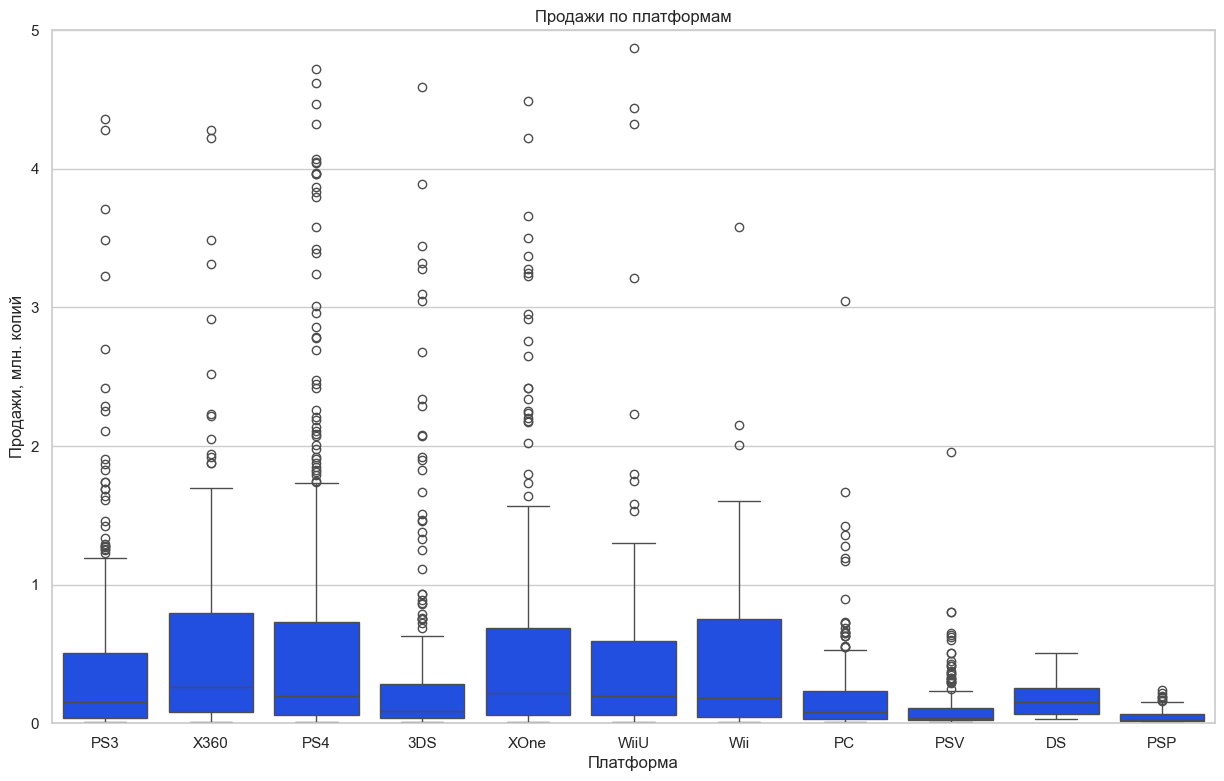

In [33]:
plt.figure(figsize=(15, 9))
ax = sns.boxplot(data=games_actual, x='platform', y='world_wide_sales')
ax.set(xlabel='Платформа', ylabel='Продажи, млн. копий', title='Продажи по платформам', ylim=(0, 5));

График показывает, что медианное значение продаж для всех платформ - менее 1 млн. копий. При этом у всех платформ большое количество выбросов - игр, которые продаются в количествах, превышающих, иногда значительно, нормальные значения для плаформы. Т.е. абсолютное большинство игр продается в количествах, значительно меньших, чем успешные игры.

Изучим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качестве примера возьмем самую популярную платформу - PS4, отобрав игры, которые имеют отзывы пользователей и критиков.

In [34]:
games_score = games_actual.query('critic_score != 0 and user_score != 0')\
[['platform', 'critic_score', 'user_score', 'world_wide_sales']]
games_ps4 = games_score.query('platform == "PS4"')
games_ps4

,platform,critic_score,user_score,world_wide_sales
42,PS4,97.0,8.3,12.62
77,PS4,82.0,4.3,8.58
92,PS4,83.0,5.7,7.66
94,PS4,85.0,5.0,7.60
105,PS4,87.0,6.5,7.17
...,...,...,...,...
16486,PS4,42.0,2.3,0.01
16499,PS4,70.0,6.8,0.01
16500,PS4,69.0,7.5,0.01
16526,PS4,61.0,7.9,0.01


Построим диаграмму рассеяния для взаимосвязи оценки пользователей с продажами.

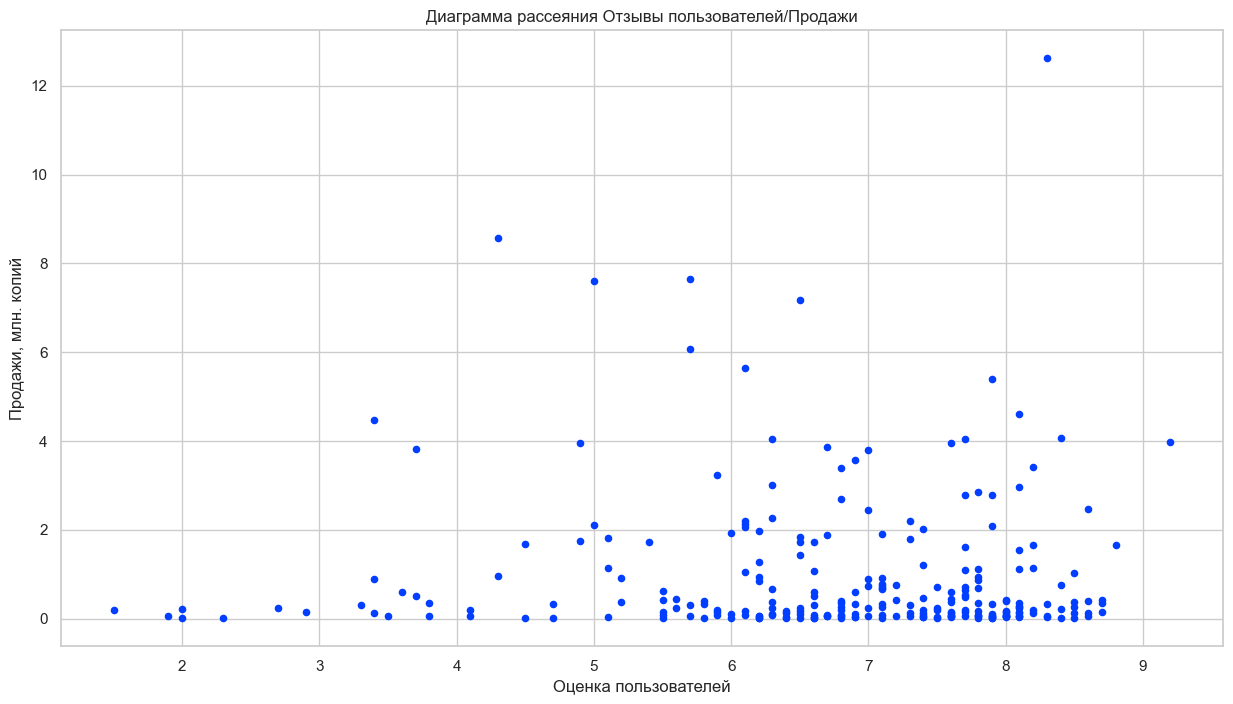

In [35]:
games_ps4.plot(x='user_score', y='world_wide_sales', kind='scatter', figsize=(15, 8), xlabel='Оценка пользователей',\
               ylabel='Продажи, млн. копий', title='Диаграмма рассеяния Отзывы пользователей/Продажи');

Посчитаем коэффициент корреляции.

In [36]:
us_corr_coeff = games_ps4['user_score'].corr(games_ps4['world_wide_sales'])
print(f'Коэффициент корреляции оценки пользователей с продажами для платформы PS4 равен {us_corr_coeff.round(2)}')

Коэффициент корреляции оценки пользователей с продажами для платформы PS4 равен -0.03


Построим диаграмму рассеяния для взаимосвязи оценки критиков с продажами.

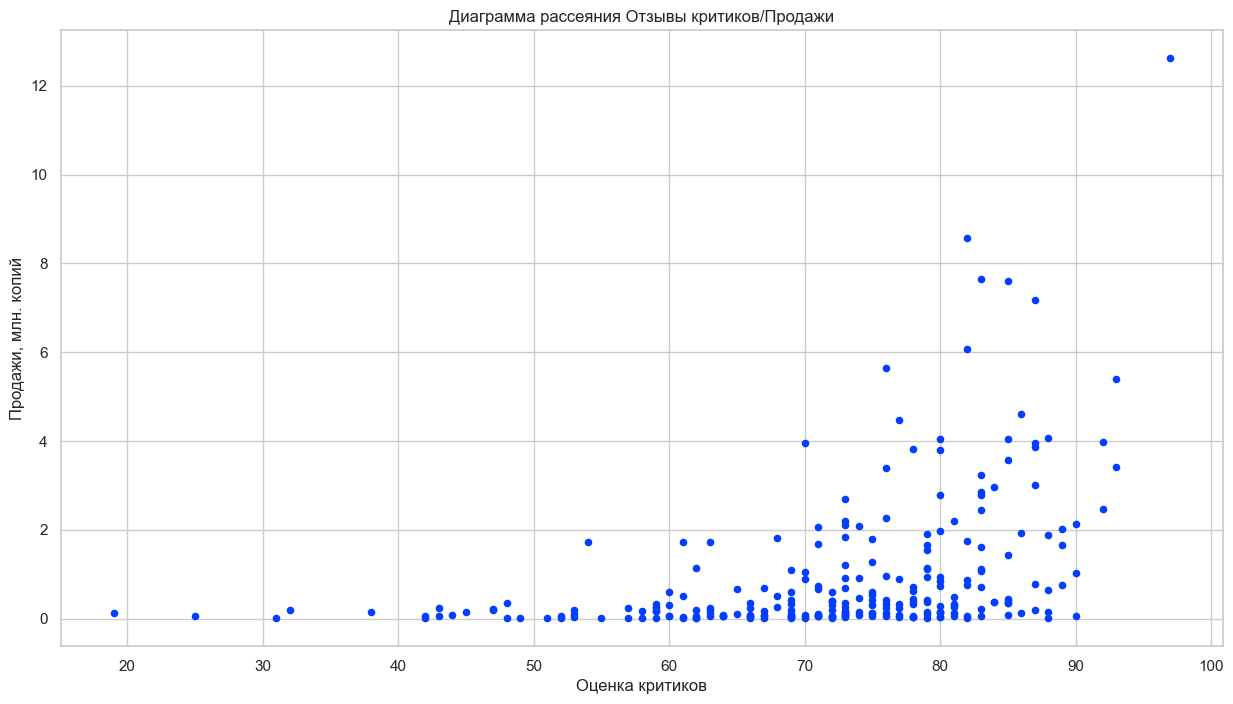

In [37]:
games_ps4.plot(x='critic_score', y='world_wide_sales', kind='scatter', figsize=(15, 8), xlabel='Оценка критиков',\
               ylabel='Продажи, млн. копий', title='Диаграмма рассеяния Отзывы критиков/Продажи');

Посчитаем коэффициент корреляции

In [38]:
cs_corr_coeff = games_ps4['critic_score'].corr(games_ps4['world_wide_sales'])
print(f'Коэффициент корреляции оценки критиков с продажами для платформы PS4 равен {cs_corr_coeff.round(2)}')

Коэффициент корреляции оценки критиков с продажами для платформы PS4 равен 0.41


На основе полученных данных можно сделать вывод, что корреляция между оценками пользователей и продажами отсутствует. Между оценками критиков и продажами есть слабая корреляция.

Посчитаем коэффициенты корреляции оценки пользователей с продажами для остальных платформ.

In [39]:
for i in games_score['platform'].unique():
    games_in_group = games_score.groupby('platform')['platform'].count()
    if games_in_group[i] != 1 and i != 'PS4':
        games_platform = games_score[games_score['platform'] == i]
        us_corr_coeff = games_platform['user_score'].corr(games_platform['world_wide_sales'])
        print(f'Коэффициент корреляции оценки пользователей с продажами для платформы {i} равен {us_corr_coeff.round(2)}')

Коэффициент корреляции оценки пользователей с продажами для платформы PS3 равен 0.02
Коэффициент корреляции оценки пользователей с продажами для платформы X360 равен -0.01
Коэффициент корреляции оценки пользователей с продажами для платформы WiiU равен 0.41
Коэффициент корреляции оценки пользователей с продажами для платформы XOne равен -0.09
Коэффициент корреляции оценки пользователей с продажами для платформы 3DS равен 0.27
Коэффициент корреляции оценки пользователей с продажами для платформы PC равен -0.11
Коэффициент корреляции оценки пользователей с продажами для платформы PSV равен 0.27


Посчитаем коэффициенты корреляции оценки критиков с продажами для остальных платформ.

In [40]:
for i in games_score['platform'].unique():
    games_in_group = games_score.groupby('platform')['platform'].count()
    if games_in_group[i] != 1 and i != 'PS4':
        games_platform = games_score[games_score['platform'] == i]
        us_corr_coeff = games_platform['critic_score'].corr(games_platform['world_wide_sales'])
        print(f'Коэффициент корреляции оценки критиков с продажами для платформы {i} равен {us_corr_coeff.round(2)}')

Коэффициент корреляции оценки критиков с продажами для платформы PS3 равен 0.33
Коэффициент корреляции оценки критиков с продажами для платформы X360 равен 0.35
Коэффициент корреляции оценки критиков с продажами для платформы WiiU равен 0.38
Коэффициент корреляции оценки критиков с продажами для платформы XOne равен 0.41
Коэффициент корреляции оценки критиков с продажами для платформы 3DS равен 0.34
Коэффициент корреляции оценки критиков с продажами для платформы PC равен 0.19
Коэффициент корреляции оценки критиков с продажами для платформы PSV равен 0.25


Вывод, сделанный для платформы PS4 относительно корреляции оценки пользователей с продажами, справедлив для платформ PS3, X360, XOne - корреляция отсутствует (коэффициент корреляции меньше 0.1), для платформ WiiU, 3DS, PC и PSV корреляция слабая (коэффициент корреляции от 0.11 до 0.41).Вывод, сделанный для платформы PS4 относительно корреляции оценки критиков с продажами, справедлив для всех остальных платформ - корреляция слабая (коэффициент корреляции от 0.19 до 0.41).

Рассмотрим распределение игр по жанрам.

genre
Puzzle            3.17
Strategy         10.08
Simulation       21.76
Adventure        23.64
Fighting         35.31
Racing           39.89
Platform         42.63
Misc             62.82
Role-Playing    145.89
Sports          150.65
Shooter         232.98
Action          321.87
Name: world_wide_sales, dtype: float64


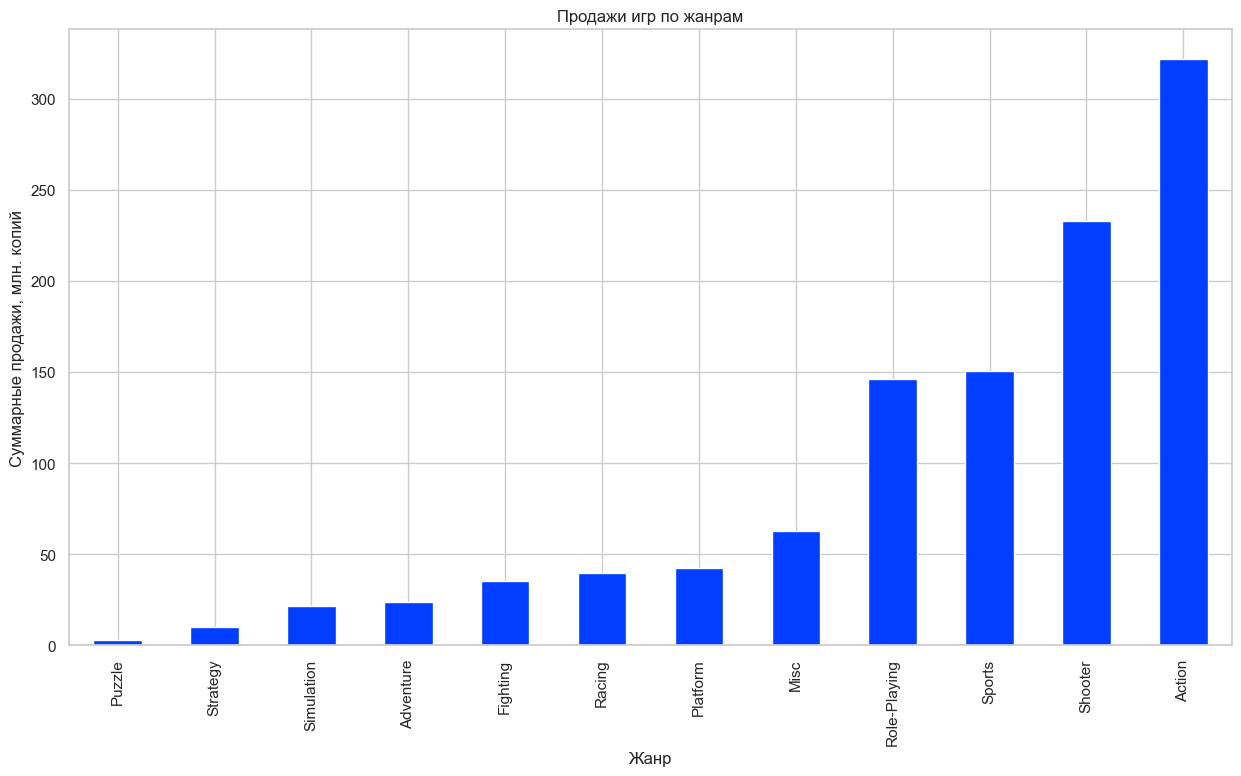

In [41]:
sales_by_actual_genre_sum = games_actual.groupby('genre')['world_wide_sales'].sum().sort_values()
print(sales_by_actual_genre_sum)
sales_by_actual_genre_sum.plot(kind='bar', figsize=(15, 8), xlabel='Жанр', ylabel='Суммарные продажи, млн. копий',\
                           title='Продажи игр по жанрам', grid=True);

На основании данных за последние четыре года с 2013 по 2016 самым популярным жанром является Action (321.87 млн. поданных копий), за ним следует Shooter (232.98 млн. проданных копий), далее Sports и Role-Playing (ок. 150 млн. копий у каждого). У остальных жанров значительно меньше 100 млн. копий. Наименее популярным является жанр  Puzzle (3.17 млн. копий).

Но, чтобы определить потенциально прибыльные жанры, нужно дополнительно рассмотреть значения средних и медианных продаж по жанрам.

In [42]:
sales_by_actual_genre = games_actual.pivot_table(index='genre', values='world_wide_sales', aggfunc=['mean', 'median'])
sales_by_actual_genre

,mean,median
,world_wide_sales,world_wide_sales
genre,,
Action,0.420196,0.110
Adventure,0.096490,0.030
Fighting,0.441375,0.125
Misc,0.405290,0.100
Platform,0.576081,0.225
Puzzle,0.186471,0.060
Racing,0.469294,0.120
Role-Playing,0.499623,0.125


Визуализируем полученные значения.

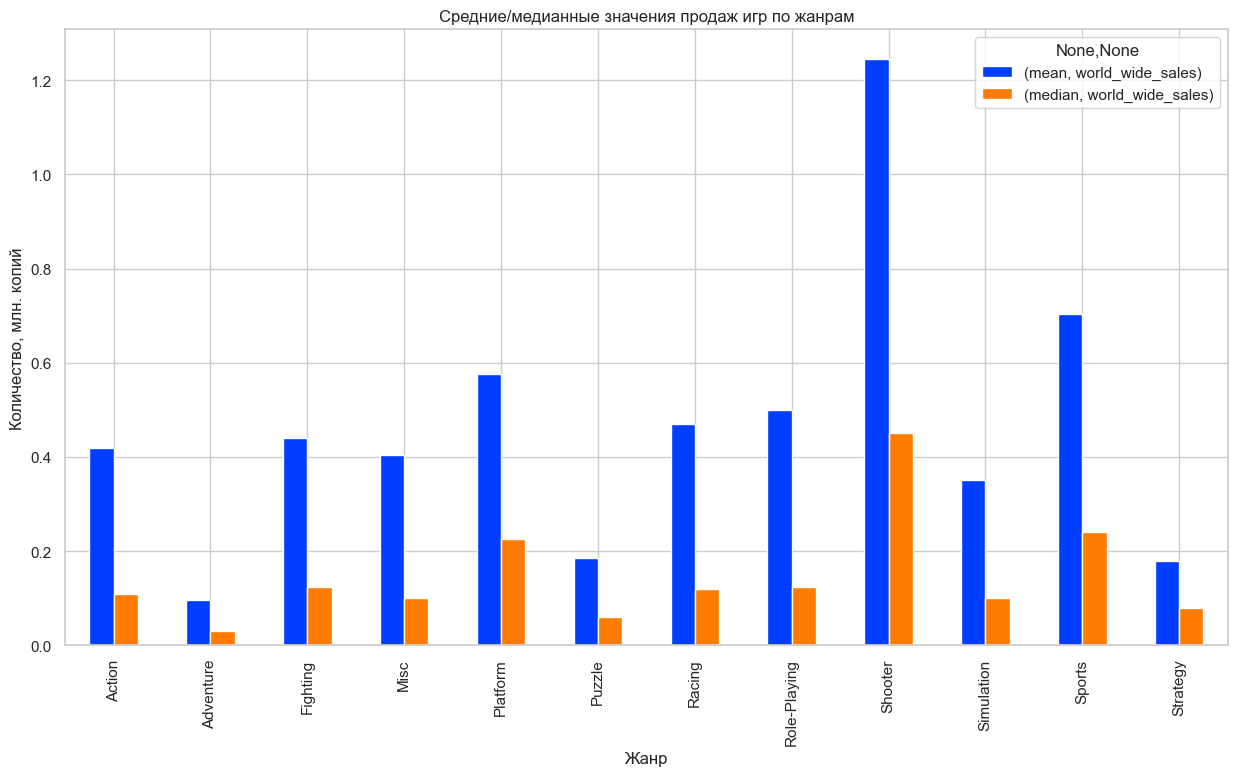

In [43]:
sales_by_actual_genre.plot(
    kind='bar', 
    figsize=(15, 8),
    xlabel='Жанр',
    ylabel='Количество, млн. копий',
    title='Средние/медианные значения продаж игр по жанрам',
    grid=True);

К потенциально прибыльным жанрам можем отнести жанры с наибольшими значениями средних и медианных продаж, это Shooter, Sports и Platform. Также обладают определенным потенциалом жанры Role-Playing, Racing, Fighting и Action.

**Шаг 4. Составим портрет пользователя каждого региона**

Определим для пользователя каждого региона (NA, EU, JP) топ-5 платформ.

In [44]:
#Для региона NA
na_platform_top_list = games_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
na_platform_top = games_actual.query('platform in @na_platform_top_list.index').groupby('platform')['na_sales'].sum()
#Для региона EU
eu_platform_top_list = games_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_platform_top = games_actual.query('platform in @eu_platform_top_list.index').groupby('platform')['eu_sales'].sum()
#Для региона JP
jp_platform_top_list = games_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_platform_top = games_actual.query('platform in @jp_platform_top_list.index').groupby('platform')['jp_sales'].sum()

Сравним результаты по регионам.

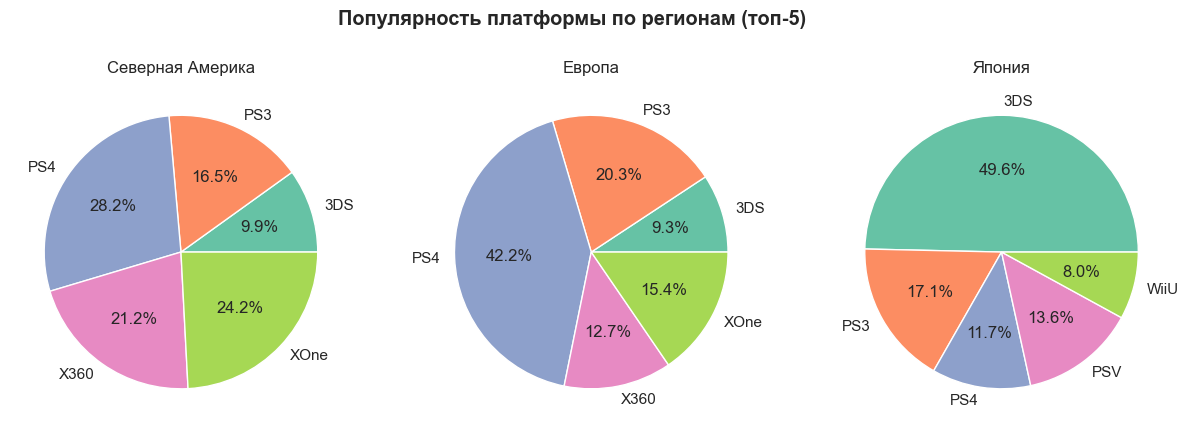

In [45]:
plt.figure(figsize=(15, 5))
plt.suptitle('Популярность платформы по регионам (топ-5)', fontweight='bold')
ax1 = plt.subplot(1, 3, 1)
ax1.set_title('Северная Америка')
ax1 = plt.pie(na_platform_top, labels = na_platform_top.index, autopct='%.1f%%', colors=sns.color_palette('Set2'))
ax2 = plt.subplot(1, 3, 2)
ax2.set_title('Европа')
ax2 = plt.pie(eu_platform_top, labels = eu_platform_top.index, autopct='%.1f%%', colors=sns.color_palette('Set2'))
ax3 = plt.subplot(1, 3, 3)
ax3.set_title('Япония')
ax3 = plt.pie(jp_platform_top, labels = jp_platform_top.index, autopct='%.1f%%', colors=sns.color_palette('Set2'))

Предпочтения пользователей в выборе игровых платформ отличаются в зависимости от региона. В Северной Америке 45,4% пользователей выбирают платформы компании Microsoft (XOne - 24.2%, X360 - 21.2%) и 44,7% пользователей выбирают платформы компании Sony ( PS4 - 28.2%, PS3 - 16.5%). Оставшиеся 9.9% пользователей выбирают платформу компании Nintendo (3DS).  В Европе платформы компании Microsoft значительно менее популярны. 62.5% пользователей выбирают платформы компании Sony ( PS4 - 42.2%, PS3 - 20.3%) и только 28.1% пользователей выбирают Microsoft (XOne - 15.4%, X360 - 12.7%). Оставшиеся 9.3% выбирают Nintendo 3DS. В Японии 57.6% пользователей выбирают платформы компании Nintendo (3DS - 49.6%, 8.0% - WiiU) и 42.4% пользователей - платформы Sony (PS3 - 17.1%, PSV - 13.6% и PS4 - 11.7%). Платформы компании Microsoft в топ-5 самых популярных платформ в Японии не входят.

Определим для пользователя каждого региона (NA, EU, JP) топ-5 жанров.

In [46]:
#Для региона NA
na_genre_top_list = games_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
na_genre_top = games_actual.query('genre in @na_genre_top_list.index').groupby('genre')['na_sales'].sum()
#Для региона EU
eu_genre_top_list = games_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_genre_top = games_actual.query('genre in @eu_genre_top_list.index').groupby('genre')['eu_sales'].sum()
#Для региона JP
jp_genre_top_list = games_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_genre_top = games_actual.query('genre in @jp_genre_top_list.index').groupby('genre')['jp_sales'].sum()

Сравним результаты по регионам.

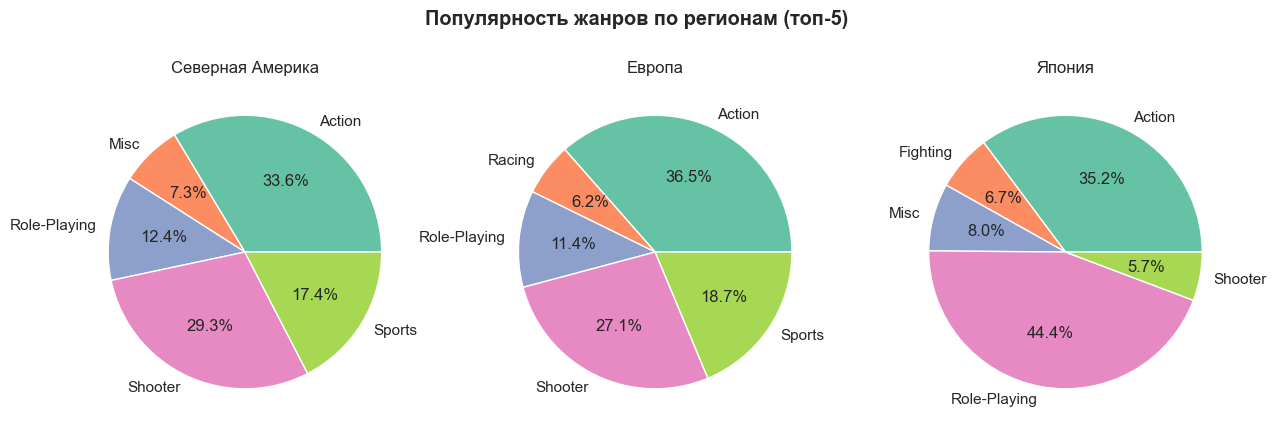

In [47]:
plt.figure(figsize=(15, 5))
plt.suptitle('Популярность жанров по регионам (топ-5)', fontweight='bold')
ax1 = plt.subplot(1, 3, 1)
ax1.set_title('Северная Америка')
ax1 = plt.pie(na_genre_top, labels = na_genre_top.index, autopct='%.1f%%', colors=sns.color_palette('Set2'))
ax2 = plt.subplot(1, 3, 2)
ax2.set_title('Европа')
ax2 = plt.pie(eu_genre_top, labels = eu_genre_top.index, autopct='%.1f%%', colors=sns.color_palette('Set2'))
ax3 = plt.subplot(1, 3, 3)
ax3.set_title('Япония')
ax3 = plt.pie(jp_genre_top, labels = jp_genre_top.index, autopct='%.1f%%', colors=sns.color_palette('Set2'))

Популярность жанров в Северной америке и Европе практически совпадает: 1 место - Action, 2 место - Shooter, 3 место - Sports, 4 место - Role-Playing, и только 5 место различается, в Северной Америке это жанр  Misc, а в Европе - Racing. В Японии ситуация значительно отличается: 1 место - Role_playing, 2 место - Action (при чем эти два жанра занимают ок. 80% рынка), 3 место - Misc, 4 место - Fighting и 5 место - Shooter.

Изучим продажи по регионам в зависимости от рейтинга.

In [48]:
#Для региона NA
na_rating = games_actual.groupby('rating')['na_sales'].sum()
#Для региона EU
eu_rating = games_actual.groupby('rating')['eu_sales'].sum()
#Для региона JP
jp_rating = games_actual.groupby('rating')['jp_sales'].sum()

Визуализируем и сравним результаты.

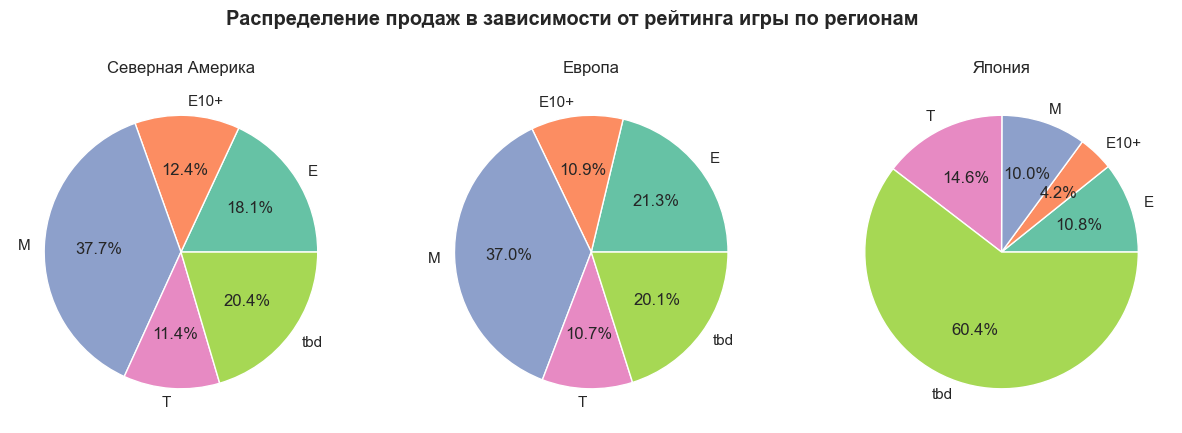

In [49]:
plt.figure(figsize=(15, 5))
plt.suptitle('Распределение продаж в зависимости от рейтинга игры по регионам', fontweight='bold')
ax1 = plt.subplot(1, 3, 1)
ax1.set_title('Северная Америка')
ax1 = plt.pie(na_rating, labels = na_rating.index, autopct='%.1f%%', colors=sns.color_palette('Set2'))
ax2 = plt.subplot(1, 3, 2)
ax2.set_title('Европа')
ax2 = plt.pie(eu_rating, labels = eu_rating.index, autopct='%.1f%%', colors=sns.color_palette('Set2'))
ax3 = plt.subplot(1, 3, 3)
ax3.set_title('Япония')
ax3 = plt.pie(jp_rating, labels = jp_rating.index, autopct='%.1f%%', colors=sns.color_palette('Set2'))

В Северной Америке и Европе ситуации схожи. Большая часть продаваемых игр имеет рейтинг М (Северная Америка - 37.7%, Европа - 37.0%), следующие по популярности игры, не получавшие рейтинг ESRB (Северная Америка - 20.4%, Европа - 20.1%) и игры с рейтингом Е (Северная Америка - 18.1%, Европа 21.3%). Два последних места по популярности это игры с рейтингом Е10+ (северная Америка - 12.4%, Европа - 10.9%) и с рейтингом Т (Северная Америка - 11.4%, Европа - 10.7%). В Японии ситуация значительно отличается. Самые популярные это игры, не получавшие рейтинг ESRB (60.4%), далее с рейтингом Т (14.6%), затем с рейтингом Е (10.8%) и М (10.0%). На последнем месте игры с рейтингом Е10+ (4.2%).

**Шаг 5. Проверим гипотезы**

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Будем использовать метод проверки гипотезы о равенстве средних двух генеральных совокупностей (двусторонней), т.к. выборки рейтингов пользователей по разным платформам являются независимыми. Нулевая гипотеза - средние значения равны, т.к. метод считает вероятность получения равного значения. Альтернативная гипотеза обратная - средние значения не равны.

In [50]:
from scipy import stats as st
# H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
# Н1 - средние пользовательские рейтинги платформ Xbox One и PC разные

# Выборка рейтингов для платформы Xbox One
rating_xone = games_actual.query('user_score != 0 and platform == "XOne"')['user_score']

# Выборка рейтингов для платформы PC
rating_pc = games_actual.query('user_score != 0 and platform == "PC"')['user_score']

# Уровень статистической значимости
alpha = 0.05 

# Проверяем двустороннюю гипотезу
results = st.ttest_ind(
    rating_xone,
    rating_pc,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.')
else:
    print('Не можем отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.') 

p-значение: 0.14759594013430463
Не можем отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


p-value показывает, что вероятность получить такое же значение равна 14.8%, это слишком большое значение, чтобы отвергать нулевую гипотезу. Для проверки выведем средние значения рейтингов пользователей для обейих платформ. 

In [51]:
print(f'Среднее значение рейтинга пользователей на платформе Xbox One равно {rating_xone.mean().round(2)}.')
print(f'Среднее значение рейтинга пользователей на платформе PC равно {rating_pc.mean().round(2)}.')

Среднее значение рейтинга пользователей на платформе Xbox One равно 6.52.
Среднее значение рейтинга пользователей на платформе PC равно 6.27.


Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Будем использовать метод проверки гипотезы о равенстве средних двух генеральных совокупностей (двусторонней), т.к. выборки рейтингов пользователей по разным жанрам являются независимыми. Нулевая гипотеза - средние значения равны, т.к. метод считает вероятность получения равного значения. Альтернативная гипотеза обратная - средние значения не равны.

In [52]:
# H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые
# Н1 - средние пользовательские рейтинги жанров Action и Sports разные

# Выборка рейтингов для платформы Xbox One
rating_action = games_actual.query('user_score != 0 and genre == "Action"')['user_score']

# Выборка рейтингов для платформы PC
rating_sports = games_actual.query('user_score != 0 and genre == "Sports"')['user_score']

# Уровень статистической значимости
alpha = 0.05 

# Проверяем двустороннюю гипотезу
results = st.ttest_ind(
    rating_action,
    rating_sports,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports не одинаковые.')
else:
    print('Не можем отвергнуть нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые.') 

p-значение: 1.4460039700704318e-20
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports не одинаковые.


p-value показывает, что вероятность получить такое же значение крайне мала, отвергаем нулевую гипотезу. Для проверки выведем средние значения рейтингов обоих жанров.

In [53]:
print(f'Среднее значение рейтинга пользователей жанра Action равно {rating_action.mean().round(2)}.')
print(f'Среднее значение рейтинга пользователей жанра Sports равно {rating_sports.mean().round(2)}.')

Среднее значение рейтинга пользователей жанра Action равно 6.84.
Среднее значение рейтинга пользователей жанра Sports равно 5.24.


**Шаг 6. Общий вывод**

В ходе работы над проектом данные были считаны из csv-файла и сохранены в переменную. Была получеа основная информация о датафрейме.

Была проведена предобработка данных:
- названия столбцов приведены к нижнему регистру;
- типы данных столбцов преведены в соответствие содержащейся в них информации;
- обработаны пропуски;
- посчитаны и записаны в отдельный столбец суммарные продажи во всех регионах.

На следующем этапе был проведен исследовательский анализ данных:
- изучено, сколько игр выпускалось в разные годы;
- изучено, как менялись продажи по платформам, выбераны платформы с наибольшими суммарными продажами и построено распределение по годам;
- определено, за какой характерный срок появляются новые и исчезают старые платформы;
- выбраны данные за актуальный период, которые помогут построить прогноз на 2017 год;
- определено, какие платформы лидируют по продажам, растут или падают;
- выберано несколько потенциально прибыльных платформ;
- построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам, описан результат;
- изучено, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, построены диаграммы рассеяния и посчитаны корреляции между отзывами и продажами;
- соотнесены выводы с продажами на других платформах;
- изучено общее распределение игр по жанрам, определены самые прибыльные жанры, выделены жанры с высокими и низкими продажами.

На следующем шаге был составлен портрет пользователя каждого региона (NA, EU, JP):
- определены топ-5 самых популярных платформ, описаны различия в долях продаж;
- определены топ-5 самых популярных жанра, описаны различия;
- изучено, влияет ли рейтинг ESRB на продажи в отдельном регионе?

В заключение были проверны гипотезы:
- гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
